In [1]:
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# metrics
from sklearn.metrics import precision_recall_curve
# plot
import matplotlib.pyplot as plt
# TSNE
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
def plot_distribution(X, y, title=None):
    tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
    low_dim_embedding = tsne.fit_transform(X)
    plot_tsne(low_dim_embedding, y, title)
    plot_decision_boundary(low_dim_embedding, y, title)

def plot_tsne(low_dim_embedding, cls, title=None):
    plt.figure(figsize=(18, 18))
    X = low_dim_embedding
    y = cls
    plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    if title:
        plt.title(title)

def plot_decision_boundary(low_dim_embedding, cls, title=None):
    plt.figure(figsize=(18, 18))
    X = low_dim_embedding
    y = cls
    reg = sklearn.linear_model.LogisticRegressionCV()
    reg.fit(X, y)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    if title:
        plt.title(title)

In [3]:
"""
Las Vegas Shooting
"""

# Load Data
path = "data/"
y = np.array([])
T1 = np.loadtxt(path+"lasvegas.vec")
T = T1
y = np.append(y, np.ones(len(T)))
F1 = np.loadtxt(path+"hurricane.vec")
F2 = np.loadtxt(path+"false.vec")
F = np.append(F1, F2, axis=0)
y = np.append(y, np.zeros(len(F)))
embedding = np.append(T,F,axis=0)
X = sklearn.preprocessing.normalize(embedding)

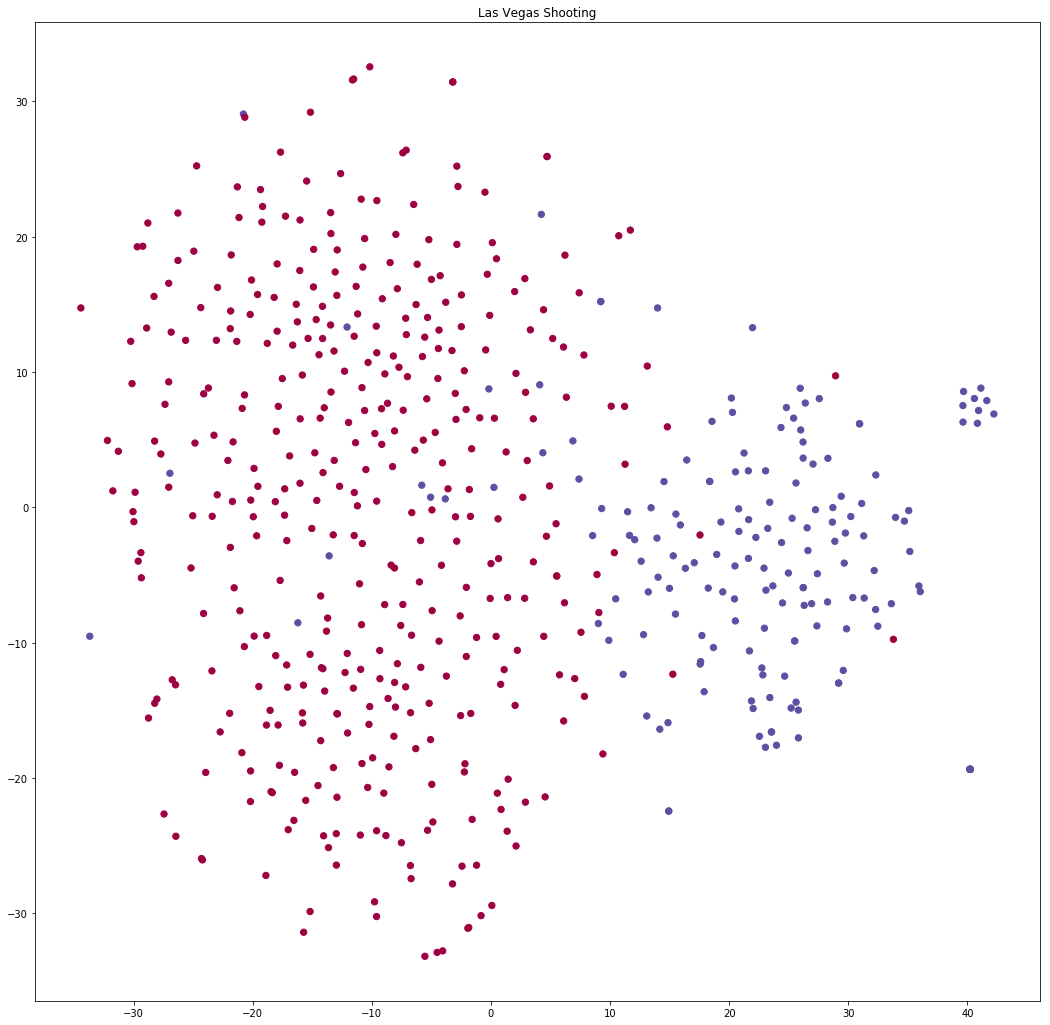

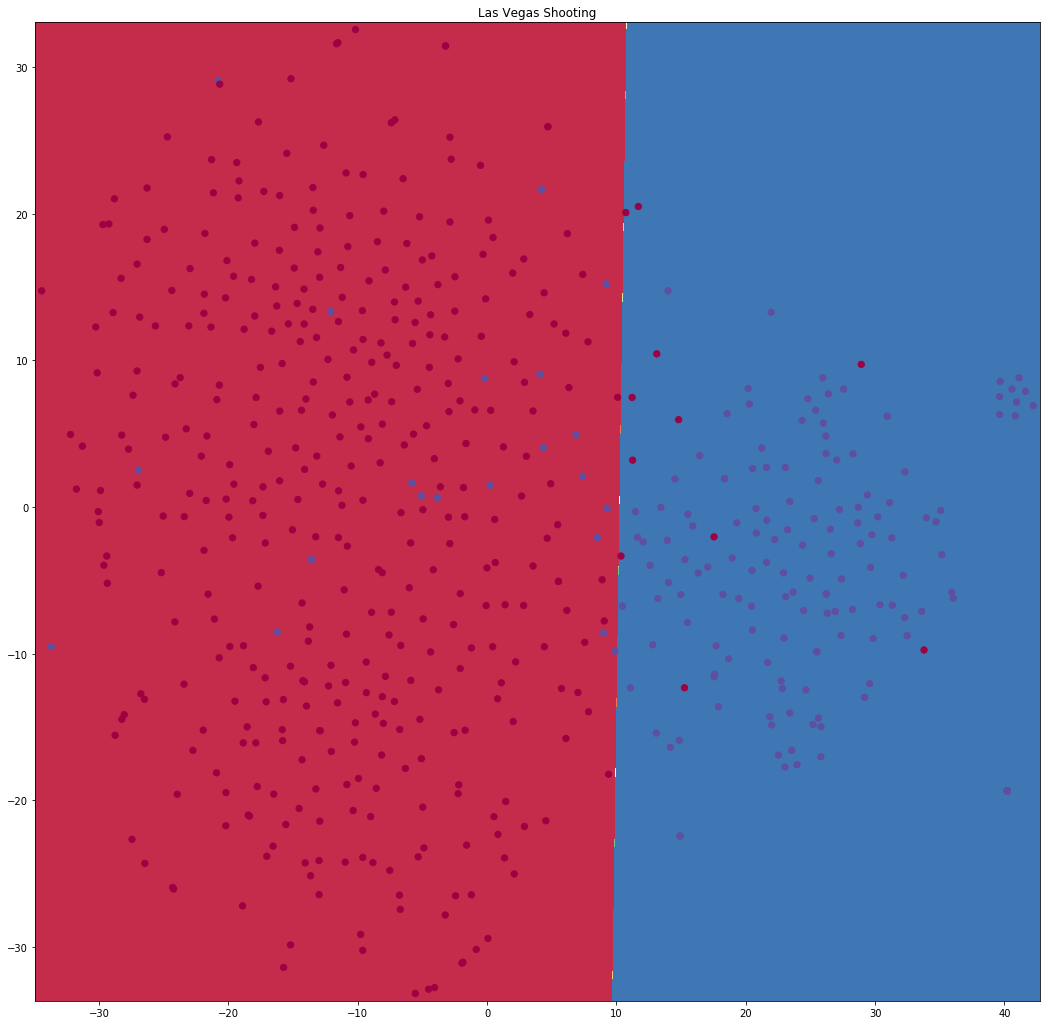

In [4]:
plot_distribution(X, y, "Las Vegas Shooting")

In [5]:
"""
Las Vegas Classifier

True: Hurricane Twitter
False: Random Sample + Las Vegas Shooting
"""

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, shuffle=True)
reg = sklearn.linear_model.LogisticRegressionCV()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
print("@P:", precision)
print("@R:", recall)
print(thresholds)

@P: [ 0.28193833  0.9375      1.        ]
@R: [ 1.      0.9375  0.    ]
[ 0.  1.]


In [6]:
"""
Hurricane
"""
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# metrics
from sklearn.metrics import precision_recall_curve
# plot
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data
path = "data/"
y = np.array([])
T1 = np.loadtxt(path+"hurricane.vec")
T = T1
y = np.append(y, np.ones(len(T)))
F1 = np.loadtxt(path+"lasvegas.vec")
F2 = np.loadtxt(path+"false.vec")
F = np.append(F1, F2, axis=0)
y = np.append(y, np.zeros(len(F)))
embedding = np.append(T,F,axis=0)
X = sklearn.preprocessing.normalize(embedding)

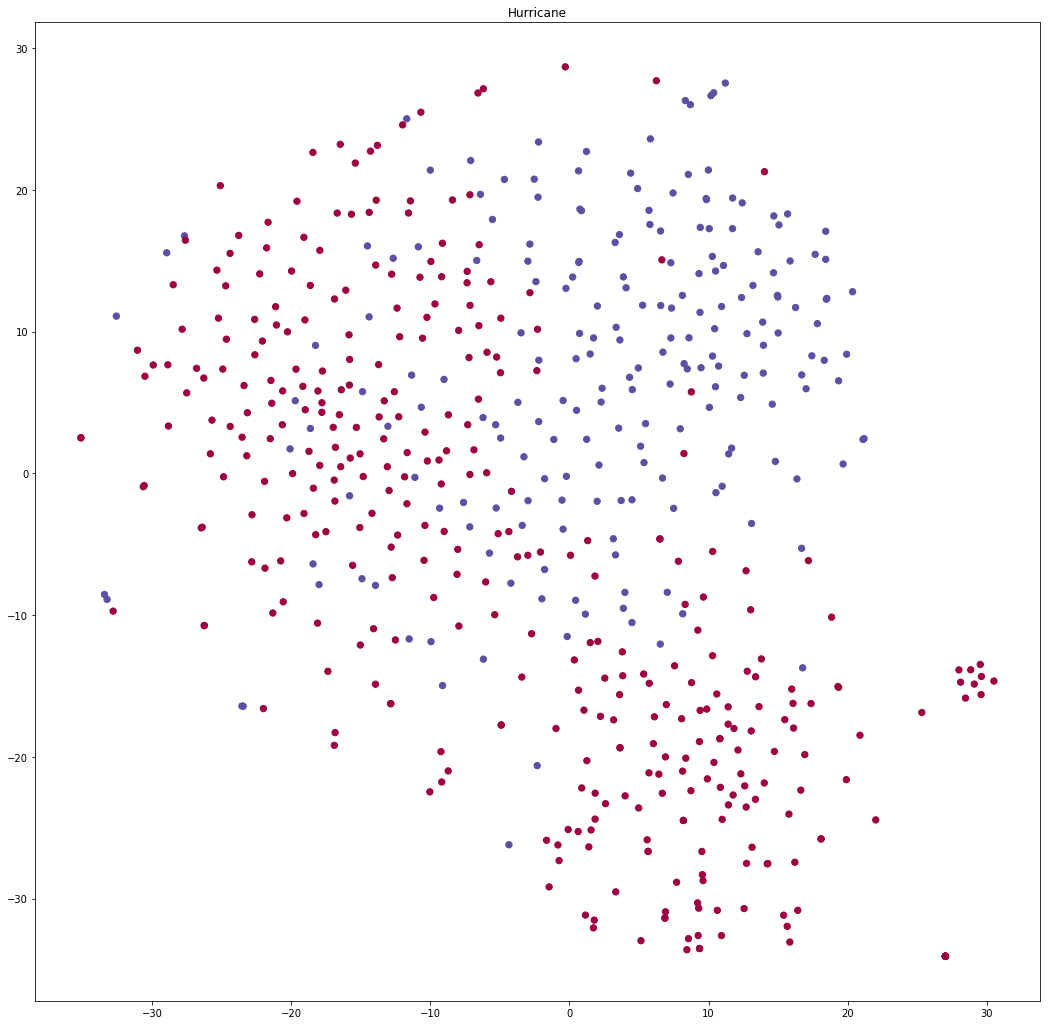

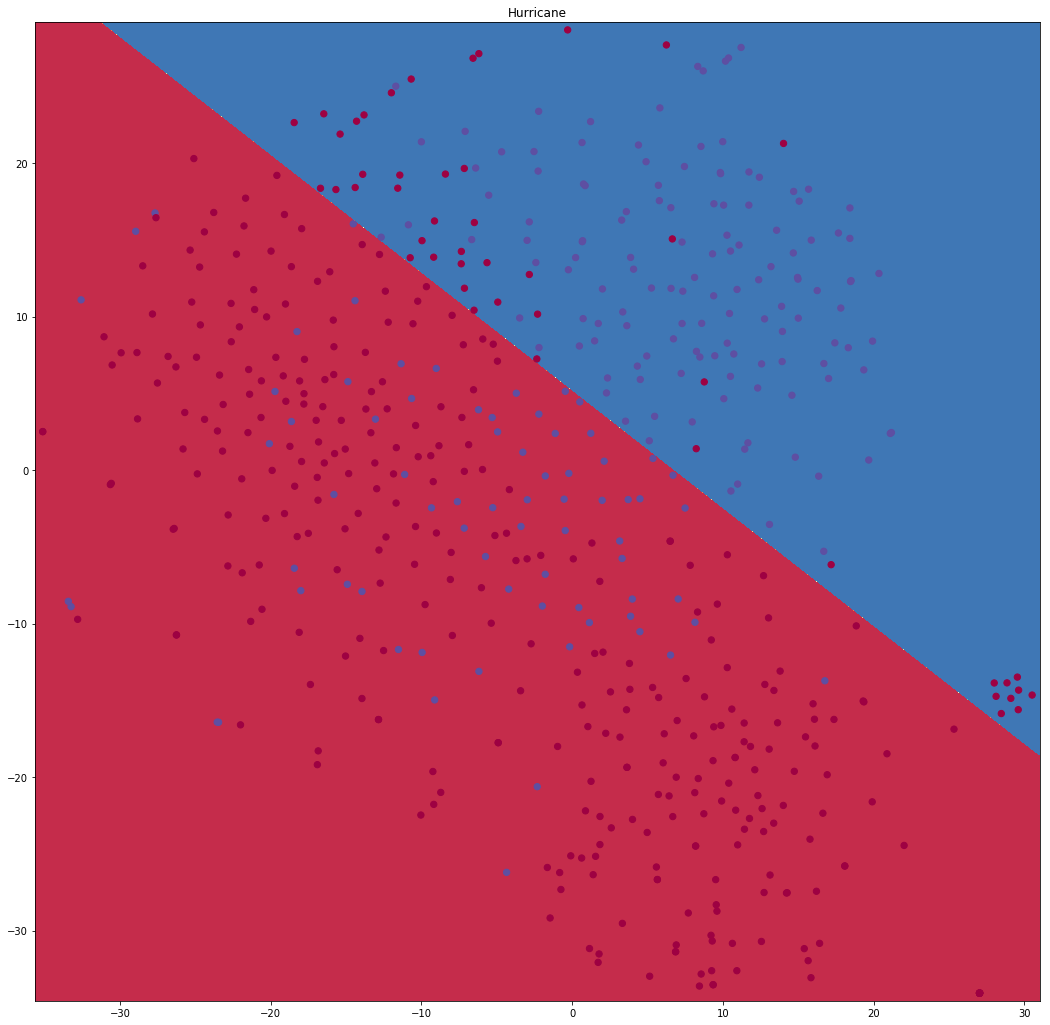

In [7]:
plot_distribution(X, y, "Hurricane")

In [8]:
"""
Hurricane Classifier

True: Hurricane Twitter
False: Random Sample + Las Vegas Shooting
"""

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, shuffle=True)
reg = sklearn.linear_model.LogisticRegressionCV()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
print("@P:", precision)
print("@R:", recall)
print(thresholds)

@P: [ 0.39647577  0.90666667  1.        ]
@R: [ 1.          0.75555556  0.        ]
[ 0.  1.]
